## *Abstract*
-------

La música desempeña un papel fundamental en nuestras vidas ya que tiene el poder de evocar emociones, conectar culturas, contar historias y sanar el alma.

Este estudio pretende analizar un dataset de canciones de música con su género y características musicales para luego de un análisis profundo, poder predecir el tipo de género de música.

En principio, exploraremos el dataset en investigaremos cuáles son las características más importantes que influyen en la predicción de los distintos géneros musicales. Luego, se examinanaremos si los géneros entre si tienen diferencias significativas que permitan describir y agrupar los mismos. Esta última pregunta nos hace plantearnos, ¿será más fácil predecir un género que otro ? Con estas tres preguntas bases, pretendemos explorar y comprender (de ser posible) la relación entre las **características musicales** y el **género de la música**.

## *Enfoque comercial*
------

Hoy en dia gracias a la globalizacion y plataformas de streaming, la cantidad de musica disponible y la diversidad de gustos musicales se ha expandido creando la necesidad de ofrecer recomendaciones personalizadas a los oyentes.

Ademas de investigar y comprender la relacion entre las distintas caracteristicas de las variables con el resultado en forma academica, el proyecto busca desarollar un modelo predictivo que pueda recomendar de forma precisa, distintos generos de musica en funcion al historial de un usuario particular.

El objetivo final sera construir un modelo de aprendizaje automatica que pueda integrearse en sistemas de recomendacion y mejorar la experiencia de usuario al recomerdarles musica adaptada a sus preferencias individuales.

Siendo que el target de este estudio son las plataformas de streaming, este tambiéen puede tener aplicaciones en la industria musical en general ya que productoras y distinto artistas pueden utilizar estos resultados para comprender mejor las preferencias de su audiencia y ajustar su estrategia de marketing y producción en consecuencia.





# **1. Introducción**
-----
## `music_genre.csv`
El dataset utilizado en este análisis proviene de Kaggle, una conocida plataforma en línea que contiene una amplia variedad de datasets y competiciones relacionadas con el aprendizaje automático y la ciencia de datos.

El conjunto de datos `music_genre.csv` se ha vuelto conocido debido a su relevancia en la clasificación de distintos géneros de música. Este contiene información detallada y variada sobre distintas canciones junto con sus respectivas características musicales, recopiladas para su análisis y clasificación.

El dataset como tal, proviene de [Spotify for Developers](https://developer.spotify.com/).


### *Variables:*
* `instance_id`: Identificador único para cada instancia
en el conjunto de datos.

* `artist_name`: Nombre del artista o banda que interpreta la canción.

* `track_name`: Nombre de la canción.

* `popularity`: Popularidad de la canción, representada como un valor numérico que va de 0 a 100. Mientas más alto es el valor, más popular es la canción.

* `acousticness`: Valor numérico que indica qué tan acústica es una canción. Un valor cercano a 1.0 indica una canción altamente acústica, mientras que un valor cercano a 0.0 indica una canción electrónica o con poca presencia acústica.

* `danceability`: Valor numérico que representa la capacidad de una canción para ser bailada basándose en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo, la fuerza del beat y la regularidad general. Cuanto mayor sea el valor, más adecuada será la canción para bailar.

* `duration_ms`: Duración de la canción en milisegundos.

* `energy`: Valor numérico entre 0 y 1 que representa la energía y la intensidad de una canción. Cuanto mayor sea el valor, más enérgica es la canción.

* `instrumentalness`: Valor numérico que indica la probabilidad de que una canción sea instrumental (sin voces). Un valor cercano a 1.0 indica alta instrumentalidad, mientras que un valor cercano a 0.0 indica que la canción es más cantada.

* `key`: Tonalidad de la canción representada según el sistema de notación anglosajón (A - G).

* `liveness`: Valor numérico que indica la presencia de audiencia en la grabación, es decir, la probabilidad de que una canción haya sido interpretada en vivo. Un valor cercano a 1.0 indica alta probabilidad de interpretación en vivo.

* `loudness`: Intensidad del sonido de una canción medida en decibeles (dB). Cuanto mayor sea el valor, más alta es la intensidad de la canción.

* `mode`: Indica el modo de la canción (mayor o menor).

* `speechiness`: Indica la presencia de elementos hablados en una canción. Cuanto mayor sea el valor, más hablada es la canción.

* `tempo`: Ritmo o velocidad de la canción, expresado en BPM (beats per minute).

* `obtained_date`: La fecha en la que se obtuvieron los datos para esta instancia en el conjunto de datos.

* `valence`: Valor numerico entre 0 y 1 que epresenta la positividad o felicidad de una canción. Cuanto mayor sea el valor, más positiva es la canción (alegre, euforica, felíz, etc.).

* `music_genre`: Etiqueta o categoría de género asignada a la canción. Esta es la variable objetivo que se intenta predecir mediante técnicas de ML.

# **2. Preparación y pre-procesamiento de datos**
----
Se realizará la instalación de librerías y se cargará el dataset.


### **2.1 Preparación y configuración de librerias**

In [ ]:
#Importacion de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Seteamos paleta de colores

paleta = ['#E484C4','#BE1285','#930D77','#720C6C','#550A64','#5C448C','#54367D','#542274','#38045B','#230453']
color_principal = '#38045B'

import matplotlib.font_manager as fm
import seaborn as sns

'''path = 'https://fonts.googleapis.com/css2?family=Hanken+Grotesk&display=swap'
fm = fm.FontManager()
fm.addfont(path)
prop = fm.FontProperties(fname=path)
sns.set(font=prop.get_name())'''

"path = 'https://fonts.googleapis.com/css2?family=Hanken+Grotesk&display=swap'\nfm = fm.FontManager()\nfm.addfont(path)\nprop = fm.FontProperties(fname=path)\nsns.set(font=prop.get_name())"

A continuación realizamos la descarga del archivo, lo leeremos con pandas y guardaremos el dataframe como `df`.

In [ ]:
# Lectura del csv con pandas
df = pd.read_csv('https://raw.githubusercontent.com/NahuelFacello/DataScience-Coderhouse/master/music_genre.csv')
df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

Buscamos conocer todos los géneros de música que pretendemos predecir.

In [ ]:
list(df['music_genre'].unique())

['Electronic',
 'Anime',
 nan,
 'Jazz',
 'Alternative',
 'Country',
 'Rap',
 'Blues',
 'Rock',
 'Classical',
 'Hip-Hop']

### **2.2 Data Wrangling**

Notamos que hay valores nulos en la lista como `nan`. Veremos cuales son:

In [ ]:
df_nan = df[df['music_genre'].isnull()]
df_nan

instance_id artist_name track_name  popularity  acousticness  \
10000          NaN         NaN        NaN         NaN           NaN   
10001          NaN         NaN        NaN         NaN           NaN   
10002          NaN         NaN        NaN         NaN           NaN   
10003          NaN         NaN        NaN         NaN           NaN   
10004          NaN         NaN        NaN         NaN           NaN   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
10000           NaN          NaN     NaN               NaN  NaN       NaN   
10001           NaN          NaN     NaN               NaN  NaN       NaN   
10002           NaN          NaN     NaN               NaN  NaN       NaN   
10003           NaN          NaN     NaN               NaN  NaN       NaN   
10004           NaN          NaN     NaN               NaN  NaN       NaN   

       loudness mode  speechiness tempo obtained_date  valence music_genre  
10000       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10001       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10002       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10003       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10004       NaN  NaN          NaN   NaN           NaN      NaN         NaN

Ya que los registros son completamente nulos y no tienen relevancia para el análisis, procederemos a borrarlas.

In [ ]:
df.dropna(inplace = True)

También observamos que hay atributos que consideramos meta datos y no aportan valor para análisis tales como:
* `instance_id`
* `track_name`
* `obtained_date`

In [ ]:
df.drop(['instance_id','track_name','obtained_date'], axis = 1, inplace = True)
df

artist_name  popularity  acousticness  danceability  \
0                  Röyksopp        27.0       0.00468         0.652   
1      Thievery Corporation        31.0       0.01270         0.622   
2            Dillon Francis        28.0       0.00306         0.620   
3                  Dubloadz        34.0       0.02540         0.774   
4               What So Not        32.0       0.00465         0.638   
...                     ...         ...           ...           ...   
50000                 BEXEY        59.0       0.03340         0.913   
50001             Roy Woods        72.0       0.15700         0.709   
50002                Berner        51.0       0.00597         0.693   
50003             The-Dream        65.0       0.08310         0.782   
50004     Naughty By Nature        67.0       0.10200         0.862   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0             -1.0   0.941           0.79200  A#     0.115    -5.201  Minor   
1         218293.0   0.890           0.95000   D     0.124    -7.043  Minor   
2         215613.0   0.755           0.01180  G#     0.534    -4.617  Major   
3         166875.0   0.700           0.00253  C#     0.157    -4.498  Major   
4         222369.0   0.587           0.90900  F#     0.157    -6.266  Major   
...            ...     ...               ...  ..       ...       ...    ...   
50000         -1.0   0.574           0.00000  C#     0.119    -7.022  Major   
50001     251860.0   0.362           0.00000   B     0.109    -9.814  Major   
50002     189483.0   0.763           0.00000   D     0.143    -5.443  Major   
50003     262773.0   0.472           0.00000   G     0.106    -5.016  Minor   
50004     267267.0   0.642           0.00000  F#     0.272   -13.652  Minor   

       speechiness               tempo  valence music_genre  
0           0.0748             100.889    0.759  Electronic  
1           0.0300  115.00200000000001    0.531  Electronic  
2           0.0345             127.994    0.333  Electronic  
3           0.2390             128.014    0.270  Electronic  
4           0.0413             145.036    0.323  Electronic  
...            ...                 ...      ...         ...  
50000       0.2980   98.02799999999999    0.330     Hip-Hop  
50001       0.0550  122.04299999999999    0.113     Hip-Hop  
50002       0.1460             131.079    0.395     Hip-Hop  
50003       0.0441   75.88600000000001    0.354     Hip-Hop  
50004       0.1010   99.20100000000001    0.765     Hip-Hop  

[50000 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   popularity        50000 non-null  float64
 2   acousticness      50000 non-null  float64
 3   danceability      50000 non-null  float64
 4   duration_ms       50000 non-null  float64
 5   energy            50000 non-null  float64
 6   instrumentalness  50000 non-null  float64
 7   key               50000 non-null  object 
 8   liveness          50000 non-null  float64
 9   loudness          50000 non-null  float64
 10  mode              50000 non-null  object 
 11  speechiness       50000 non-null  float64
 12  tempo             50000 non-null  object 
 13  valence           50000 non-null  float64
 14  music_genre       50000 non-null  object 
dtypes: float64(10), object(5)
memory usage: 6.1+ MB


# **3. Exploratory Data Analysis (EDA)**
-----

A continuación vamos a explorar las variables numericas con el método `describe`:

In [ ]:
df.describe().round(2)

popularity  acousticness  danceability  duration_ms    energy  \
count    50000.00      50000.00      50000.00     50000.00  50000.00   
mean        44.22          0.31          0.56    221252.60      0.60   
std         15.54          0.34          0.18    128671.96      0.26   
min          0.00          0.00          0.06        -1.00      0.00   
25%         34.00          0.02          0.44    174800.00      0.43   
50%         45.00          0.14          0.57    219281.00      0.64   
75%         56.00          0.55          0.69    268612.25      0.82   
max         99.00          1.00          0.99   4830606.00      1.00   

       instrumentalness  liveness  loudness  speechiness   valence  
count          50000.00  50000.00  50000.00     50000.00  50000.00  
mean               0.18      0.19     -9.13         0.09      0.46  
std                0.33      0.16      6.16         0.10      0.25  
min                0.00      0.01    -47.05         0.02      0.00  
25%                0.00      0.10    -10.86         0.04      0.26  
50%                0.00      0.13     -7.28         0.05      0.45  
75%                0.16      0.24     -5.17         0.10      0.65  
max                1.00      1.00      3.74         0.94      0.99

A simple vista notamos que la el atributo `duration_ms` tiene como valor mínimo como -1. Dado que la duración negativa no existe, observemos estos registros y la cantidad:

In [ ]:
df_duracion_negativa = df[df['duration_ms'] < 0]
print('Cantidad de registros con duracion negativa: ',df_duracion_negativa.popularity.count(),end = '\n \n')
print('% de registros con duracion negativa sobre el total: ','{:.1%}'.format(df_duracion_negativa.popularity.count()/df.popularity.count()),end = '\n \n')
df_duracion_negativa

Cantidad de registros con duracion negativa:  4939
 
% de registros con duracion negativa sobre el total:  9.9%
 


artist_name  popularity  acousticness  danceability  \
0                  Röyksopp        27.0       0.00468         0.652   
13                DJ Shadow        31.0       0.86000         0.737   
16                 San Holo        59.0       0.13600         0.336   
24              The Prodigy        56.0       0.06800         0.725   
35             Fabian Mazur        33.0       0.10800         0.493   
...                     ...         ...           ...           ...   
49956           empty_field        52.0       0.13300         0.867   
49969  Bone Thugs-N-Harmony        47.0       0.01270         0.706   
49979           Young Dolph        47.0       0.48300         0.789   
49981            Mac Miller        60.0       0.06350         0.594   
50000                 BEXEY        59.0       0.03340         0.913   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0             -1.0   0.941          0.792000  A#    0.1150    -5.201  Minor   
13            -1.0   0.405          0.036100   A    0.1730   -10.536  Minor   
16            -1.0   0.746          0.000000  C#    0.7370    -4.315  Minor   
24            -1.0   0.877          0.000036   C    0.0900    -3.496  Major   
35            -1.0   0.682          0.000000   A    0.1960    -5.781  Minor   
...            ...     ...               ...  ..       ...       ...    ...   
49956         -1.0   0.618          0.000002   B    0.1280    -4.956  Minor   
49969         -1.0   0.787          0.000000   A    0.2650    -5.314  Major   
49979         -1.0   0.452          0.000000   B    0.0892    -7.538  Minor   
49981         -1.0   0.823          0.000000   A    0.0950    -5.210  Major   
50000         -1.0   0.574          0.000000  C#    0.1190    -7.022  Major   

       speechiness              tempo  valence music_genre  
0           0.0748            100.889   0.7590  Electronic  
13          0.0424            154.745   0.6470  Electronic  
16          0.0685            151.756   0.2100  Electronic  
24          0.0646            105.919   0.0977  Electronic  
35          0.2870                  ?   0.2390  Electronic  
...            ...                ...      ...         ...  
49956       0.0614            140.005   0.8570     Hip-Hop  
49969       0.0888             85.963   0.2430     Hip-Hop  
49979       0.4800            140.101   0.2840     Hip-Hop  
49981       0.3320             97.101   0.6630     Hip-Hop  
50000       0.2980  98.02799999999999   0.3300     Hip-Hop  

[4939 rows x 15 columns]

Los registros con duración negativa representan el 10% de nuestros dataset. Considerando que, por lo general, las obras de música clásica son mas extensas que aquellas de otros géneros, intuimos que el parámetro de duración es importante.

Graficaremos la distribución de la duración, con y sin los negativos.

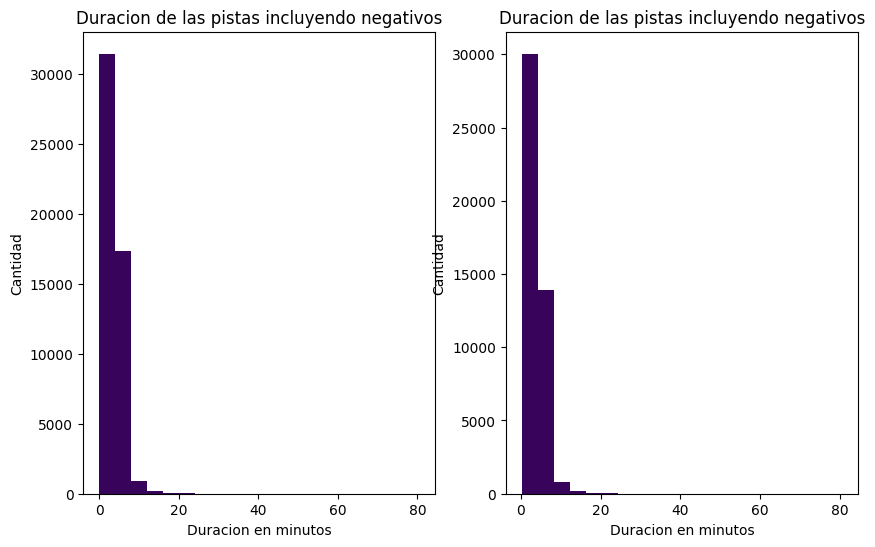

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,6))
ax[0].hist(df.duration_ms*1.6667e-5, bins = 20, color = color_principal) #Realizamos la conversión de ms a minutos
ax[0].set_title("Duracion de las pistas incluyendo negativos")
ax[0].set_xlabel("Duracion en minutos")
ax[0].set_ylabel("Cantidad")
ax[1].hist(df[df['duration_ms'] >= 0]['duration_ms'] *1.6667e-5, bins = 20, color = color_principal)
ax[1].set_title("Duracion de las pistas incluyendo negativos")
ax[1].set_xlabel("Duracion en minutos")
ax[1].set_ylabel("Cantidad")
fig.show()

Notamos que la distribución de la duración parece no estar afectada por la cantidad de datos. Tendremos en cuenta esta situación luego de realizado el en la evualacion del despeño del modelo para ver si esta estos registros pueden influir.

A continuación, graficamos la distribución de la duracion por género.

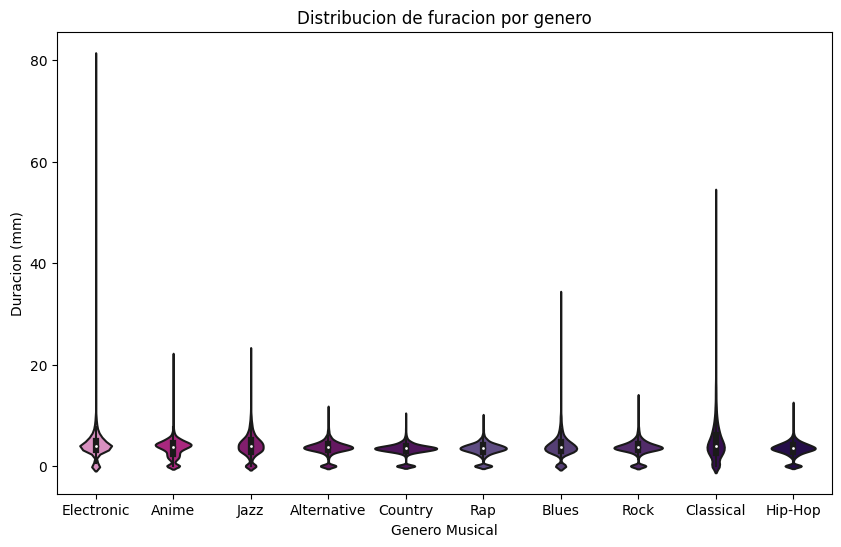

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.violinplot(x='music_genre', y= df.duration_ms*1.6667e-5, data= df, palette = paleta)
plt.xlabel('Genero Musical')
plt.ylabel('Duracion (mm)')
plt.title('Distribucion de furacion por genero')
plt.show()

Notamos efectivamente que las canciones del género clásico son mas extensas que el resto, sin embargo **aun mas extensas son las del género electrónica**.


> Podemos suponer entonces, que una canción con una duración mayor a 60 minutos puede estar relacionada a el género *electrónica*.



Así también, otro factor importante a tener en cuenta es que la distribucion de los géneros *clasico, blues, y jazz* tienen mayor distribución en variable `duration_ms` que el resto de los géneros.



## 3.1 Analisis Univariado
------

A continuacion analizaremos las variables que consideramos importantes o con mas probabilidad de ser generadoras de insights.

### 3.1.a Acousticness
Representa en valores entre 0 y 1 que tan acustica es una cancion siendo 0 poco o nada acustica y 1 que muy acústica.


In [ ]:
df.acousticness.describe()

count    50000.000000
mean         0.306383
std          0.341340
min          0.000000
25%          0.020000
50%          0.144000
75%          0.552000
max          0.996000
Name: acousticness, dtype: float64

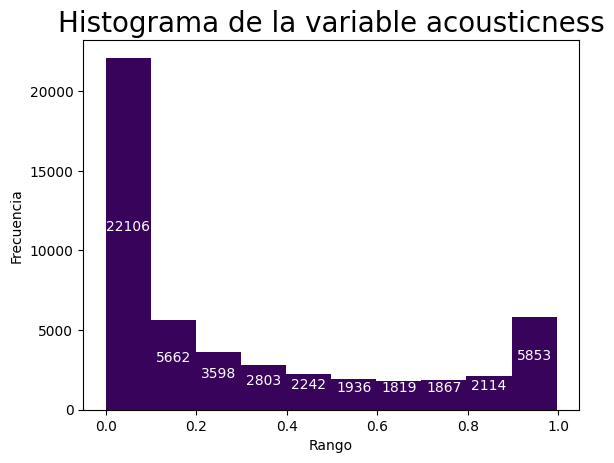

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.acousticness, color = color_principal)
ax.set_title("Histograma de la variable acousticness",size = 20)
ax.set_xlabel("Rango")
ax.set_ylabel("Frecuencia")

#Calculo y agrego las cantidad
hist, bordes = np.histogram(df.acousticness, bins=10)
for i in range(len(hist)):
    if hist[i] > 0:
        x = (bordes[i] + bordes[i + 1]) / 2  # Ubicación sobre el eje x para poner los valores
        y = hist[i]/2
        plt.annotate(str(hist[i]),  xy=(x, y), ha='center', va='bottom', color = '#ffffff')


fig.show()

Del gráfico podemos notar que tiene forma semejeante a una U (o *U-shaped*) lo que podria representar un comportomiento bimodal con lo que refiere a la variable `acousticness`.

Nuestro dataset cuenta con canciones que en su mayoria cuenta con poca presencia acustica. Podemos esperar que las canciones menos acusticas sean aquellas de electronica y en oposición, las mas acustucas las de música clasica.

Text(0.5, 0, 'Rango')

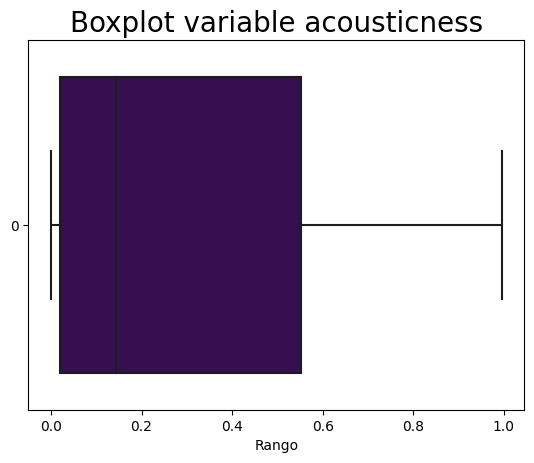

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data = df.acousticness, orient = 'h', color = color_principal)
ax.set_title("Boxplot variable acousticness",size = 20)
ax.set_xlabel("Rango")


Finalmente con el grafico de boxplot, entendimos que la mayoria se encuentra por debajo del .6 de acusticidad con un promedio del 30%.

### 3.1.b Instrumentalness

Refiere a la probabilidad de que una cancion sea solamente instrumental, siendo 1 instrumental y 0 con voces

In [ ]:
df.instrumentalness.describe()

count    50000.000000
mean         0.181601
std          0.325409
min          0.000000
25%          0.000000
50%          0.000158
75%          0.155000
max          0.996000
Name: instrumentalness, dtype: float64

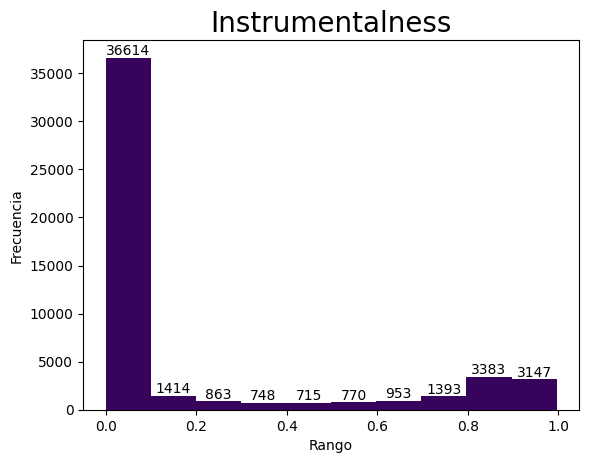

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.instrumentalness, color = color_principal, bins = 10)
ax.set_title("Instrumentalness",size = 20)
ax.set_xlabel("Rango")
ax.set_ylabel("Frecuencia")

#Calculo y agrego las cantidad
hist, bordes = np.histogram(df.instrumentalness, bins=10)
for i in range(len(hist)):
    if hist[i] > 0:
        x = (bordes[i] + bordes[i + 1]) / 2  # Ubicación sobre el eje x para poner los valores
        y = hist[i]
        plt.annotate(str(hist[i]),  xy=(x, y), va='bottom', ha='center')


fig.show()

Text(0.5, 0, 'Rango')

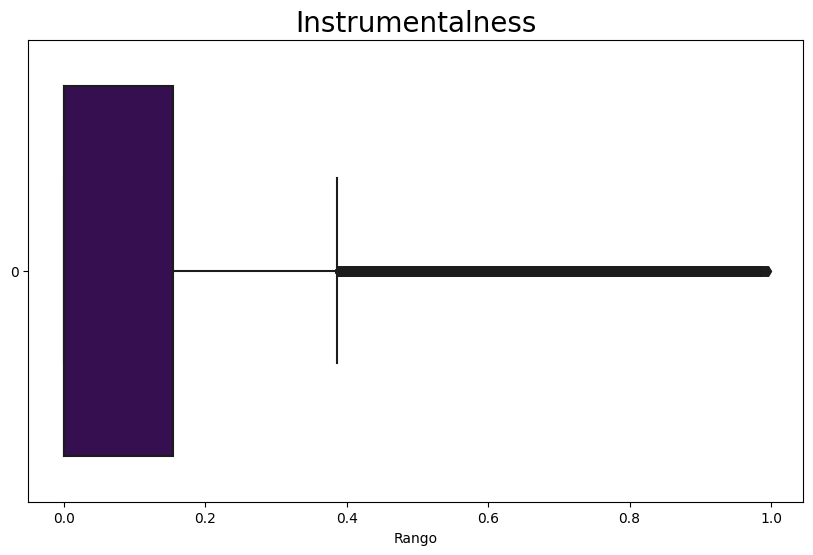

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = df.instrumentalness, orient = 'h', color = color_principal)
ax.set_title("Instrumentalness",size = 20)
ax.set_xlabel("Rango")

La distribución de frecuencia de la variable instrumentalness parece ser muy semejante a la demostrada en acousticness, pero al momento de realizar el grafico de boxplot a partir del .4 notamos que parecen ser outliers.

Aquellos que estan cercanos a 1 podrían ser indicativos pero su distribución podria afectar la predictibilidad.

Podriamos transformar esta variable en 2, siendo de aprox 0 a .4 cantada y de 0.4 a 1 instrumental.


### 3.1.c Registros por genero

Investigamos la cantidad de registros por genero

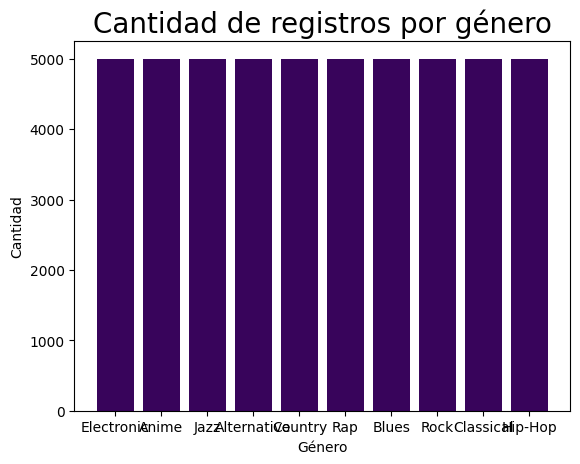

In [ ]:
cantidad_genero = df.music_genre.value_counts()
fig, ax = plt.subplots()
ax.bar(cantidad_genero.index, cantidad_genero.values, color = color_principal)
ax.set_title("Cantidad de registros por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad")
fig.show()

In [ ]:
df.music_genre.value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

  La distribucion de la cantidad de registros, es equitativa.

### 3.1.d Danceability
Valor numérico que representa la capacidad de una canción para ser bailada siendo 0 poco bailable y 1 muy bailable.

In [ ]:
df.danceability.describe()

count    50000.000000
mean         0.558241
std          0.178632
min          0.059600
25%          0.442000
50%          0.568000
75%          0.687000
max          0.986000
Name: danceability, dtype: float64

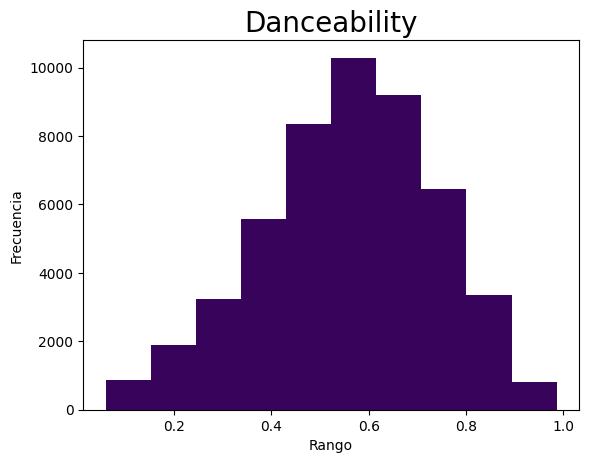

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.danceability, color = color_principal, bins = 10)
ax.set_title("Danceability",size = 20)
ax.set_xlabel("Rango")
ax.set_ylabel("Frecuencia")

fig.show()

La distribución de la variable es normal, ampliaremos en el analisis bivariado.

### 3.1.e Loudness
Medida en dB que indica la intensidad de una canción. Cuanto mayor sea el valor, más alta es la intensidad de la canción.

In [ ]:
df.loudness.describe()

count    50000.000000
mean        -9.133761
std          6.162990
min        -47.046000
25%        -10.860000
50%         -7.276500
75%         -5.173000
max          3.744000
Name: loudness, dtype: float64

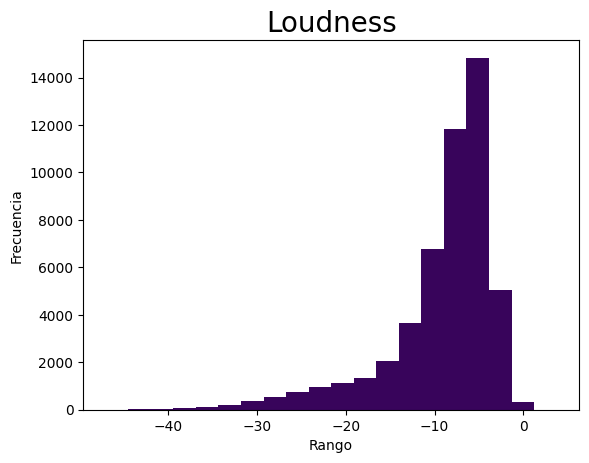

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.loudness, color = color_principal, bins = 20)
ax.set_title("Loudness",size = 20)
ax.set_xlabel("Rango")
ax.set_ylabel("Frecuencia")

fig.show()

La distribucion esta sesgada a la derecha siendo que la mayoria de las canciones se encuentran entre -10 y -5. Un valor mas negativo implica sonido mas suaves y cercanos a 0 mas fuertes-intensos.

### 3.1.f Energy
Valor numérico entre 0 y 1 que representa la energía y la intensidad de una canción

In [ ]:
 df.energy.describe()

count    50000.000000
mean         0.599755
std          0.264559
min          0.000792
25%          0.433000
50%          0.643000
75%          0.815000
max          0.999000
Name: energy, dtype: float64

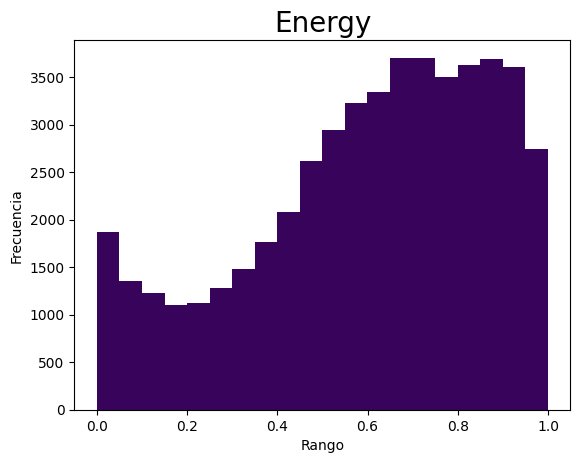

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.energy, color = color_principal, bins = 20)
ax.set_title("Energy",size = 20)
ax.set_xlabel("Rango")
ax.set_ylabel("Frecuencia")

fig.show()

Text(0.5, 0, 'Rango')

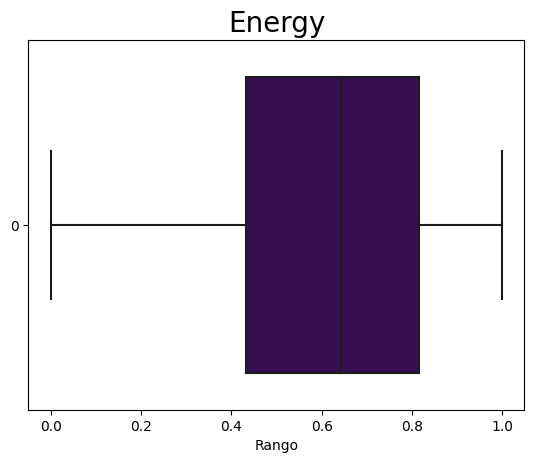

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data = df.energy, orient = 'h', color = color_principal)
ax.set_title("Energy",size = 20)
ax.set_xlabel("Rango")

Notamos que el comportamiento es semejante al de la variable loudness ya que en el calculo de loudness, energy juega un papel fundamental para definir la intensidad.

Sin embargargo, se nota un poco mas estable que la anterior tambien con un leve sesgo hacia la derecha.

## 3.2 Analisis Bivariado y multivariado

Exploraremos una variable que puede influir, `danceability`, que indica la danzabilidad de las pistas:

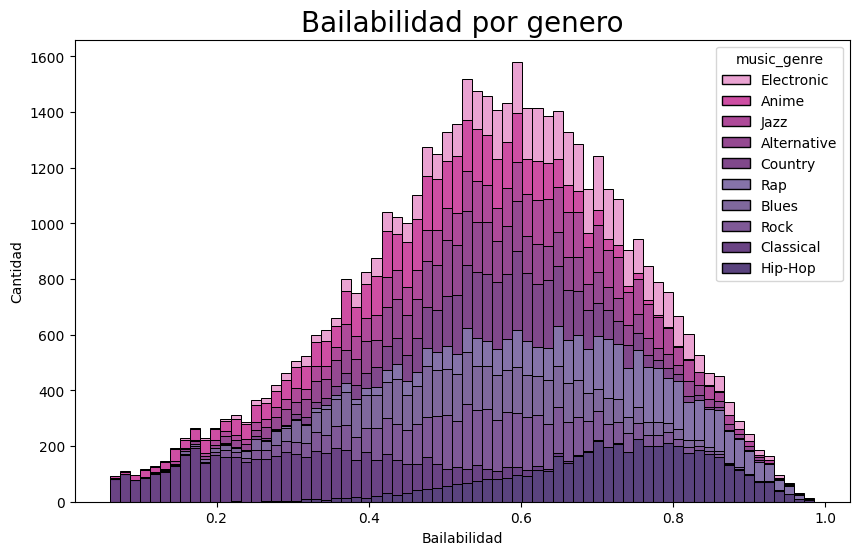

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(data = df, x = 'danceability', hue = 'music_genre', palette = paleta,ax = ax, multiple = 'stack' )
ax.set_title("Bailabilidad por genero",size = 20)
ax.set_xlabel("Bailabilidad")
ax.set_ylabel("Cantidad")
fig.show()

Aqui podemos notar que parece haber una relación entre el *Hip-Hop* y las canciones mas bailabes y la *música clásic*a con las que son menos bailables, con lo cual el atributo `danceability` podria definir el tipo de género de una canción de *hip-hop* o *música clásica*. Evaluaremos lo mismo con `instrumentalness`.

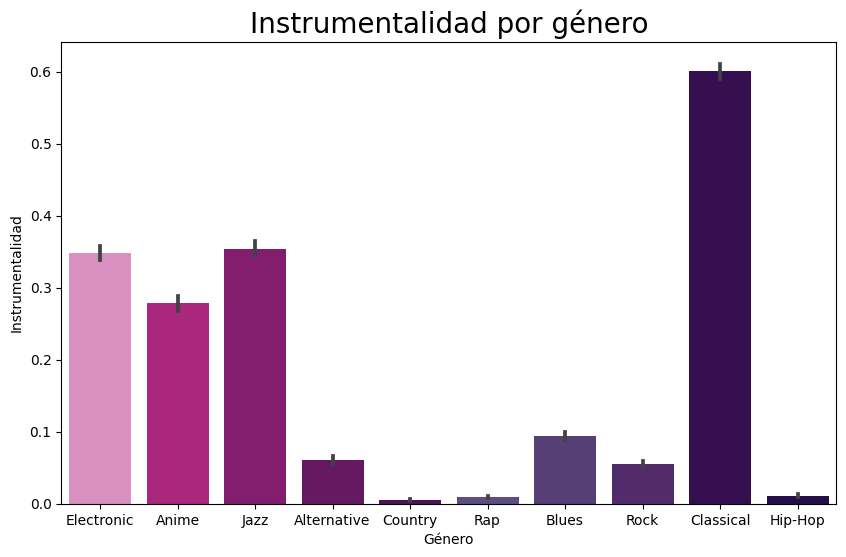

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df, x='music_genre',y= 'instrumentalness', ax = ax, palette = paleta)
ax.set_title("Instrumentalidad por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Instrumentalidad")
fig.show()

A diferencia del caso anterior, la *música clásica* es mucho más instrumental que otros géneros como el *country, rap o hip-hop*. Con lo cual esta variable podría ser decisiva al momento de definir si se trata de *música clásica*.

<ipython-input-30-7e4ebd40574d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.iloc[:,1:].corr() # Creo una matriz de correlacion


Text(0.5, 1.0, 'Mapa de Calor')

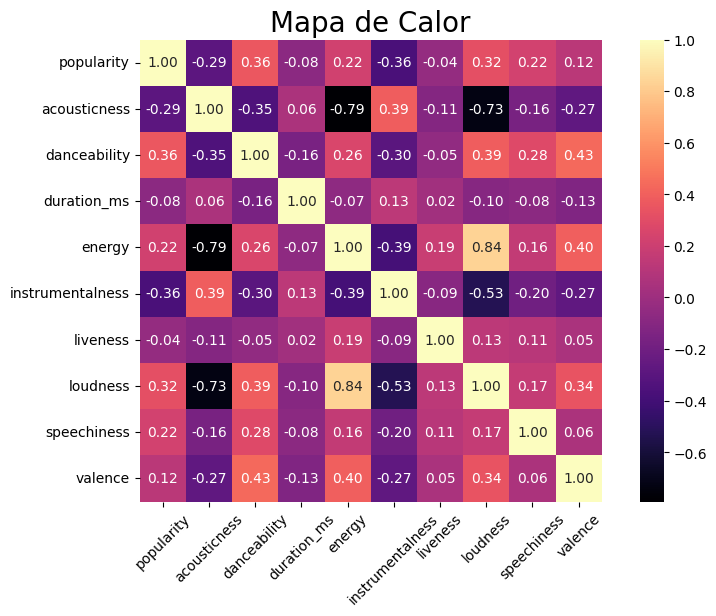

In [ ]:
correlacion = df.iloc[:,1:].corr() # Creo una matriz de correlacion

fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(correlacion,  cmap = "magma",square=True, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_title("Mapa de Calor",size = 20)

Creamos un mapa de calor con las variables numéricas para encontrar mas relaciones.
Notamos que hay una relación fuerte entre `energy` y `loudness` y, de forma opuesta entre `energy`, el `loudness` y `acousticness`.

Inspeccionemos los artistas en función a los géneros:

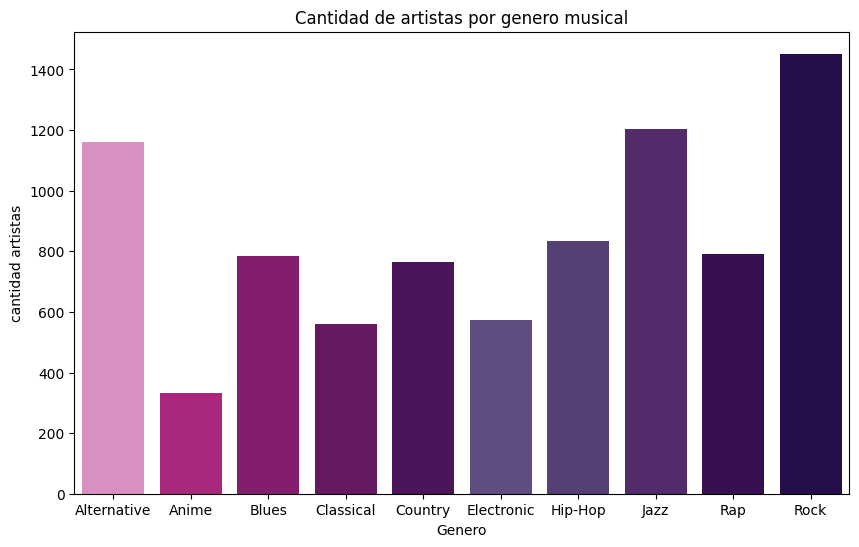

In [ ]:
artist_genre_counts = df.groupby('music_genre')['artist_name'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_genre_counts.index, y=artist_genre_counts.values, palette = paleta)
plt.xlabel('Genero')
plt.ylabel('cantidad artistas')
plt.title('Cantidad de artistas por genero musical')
plt.show()

In [ ]:
df_artistas_genero = df.pivot_table(index='artist_name', columns='music_genre', aggfunc='size', fill_value=0)

df_artistas_genero

music_genre          Alternative  Anime  Blues  Classical  Country  \
artist_name                                                          
!!!                            1      0      0          0        0   
"Weird Al" Yankovic            0      0      0          0        0   
$NOT                           0      0      0          0        0   
$tupid Young                   0      0      0          0        0   
$uicideBoy$                    0      0      0          0        0   
...                          ...    ...    ...        ...      ...   
棗坂シキ(CV.平川大輔)                  0      1      0          0        0   
楚神ウリエ(CV.近藤隆)                  0      2      0          0        0   
立華リツカ(CV.茜屋日海夏)                0      1      0          0        0   
鉤貫レム(CV.斉藤壮馬)                  0      1      0          0        0   
黒崎真音                           0     10      0          0        0   

music_genre          Electronic  Hip-Hop  Jazz  Rap  Rock  
artist_name                                                
!!!                          21        0     0    0     0  
"Weird Al" Yankovic           0        0     0    0     1  
$NOT                          0        3     0    0     0  
$tupid Young                  0        0     0    1     0  
$uicideBoy$                   0       51     0   41     0  
...                         ...      ...   ...  ...   ...  
棗坂シキ(CV.平川大輔)                 0        0     0    0     0  
楚神ウリエ(CV.近藤隆)                 0        0     0    0     0  
立華リツカ(CV.茜屋日海夏)               0        0     0    0     0  
鉤貫レム(CV.斉藤壮馬)                 0        0     0    0     0  
黒崎真音                          0        0     0    0     0  

[6863 rows x 10 columns]

A primera vista, notamos que el artista *$uicideBoy$* tiene dos géneros, lo cual si vemos la variable objetivo desde el punto del artista, podría resultar poco util determinados casos.

In [ ]:
df_artistas_genero = df.groupby('artist_name')['music_genre'].nunique()
df_artistas_varios_genero = df_artistas_genero[df_artistas_genero > 1].index.tolist()
print('Cantidad artistas con mas de un genero: ',len(df_artistas_varios_genero))
df_artistas_varios_genero

Cantidad artistas con mas de un genero:  1375


['!!!',
 '$uicideBoy$',
 '03 Greedo',
 '070 Shake',
 '10 Years',
 '112',
 '2 Chainz',
 '2 LIVE CREW',
 '21 Savage',
 '24hrs',
 '2Pac',
 '3 Doors Down',
 '311',
 '38 Special',
 '50 Cent',
 '6 Dogs',
 '6LACK',
 '7eventh Time Down',
 '88GLAM',
 'A Perfect Circle',
 'A Tribe Called Quest',
 'A$AP Ferg',
 'A$AP Mob',
 'A$AP Rocky',
 'A$AP Twelvyy',
 'ASIAN KUNG-FU GENERATION',
 'AWOLNATION',
 'AZ',
 'Aaron Lewis',
 'Aaron Shust',
 'Aaron Tippin',
 'Aaron Watson',
 'Ab-Soul',
 'Abstract',
 'Ace Hood',
 'Action Bronson',
 'Adam Calhoun',
 'Adam Craig',
 'Adam Jensen',
 'Adam Sanders',
 'Adelitas Way',
 'Aer',
 'Aesop Rock',
 'Afroman',
 'Aim',
 'Air',
 'Akira Ifukube',
 'Al Di Meola',
 'Alabama',
 'Alanis Morissette',
 'Albert Hammond, Jr.',
 'Aleks Syntek',
 'Alice Cooper',
 'Alice In Chains',
 'All That Remains',
 'All Them Witches',
 'Ambrosia',
 'America',
 'American Authors',
 'American Football',
 'Amerie',
 'Aminé',
 'Amon Tobin',
 'Anberlin',
 'Andrés Calamaro',
 'Andy Gibb',
 'Andy G

1375 artistas tienen canciones que entran en mas de un género en simultaneo, siendo que esta variable tampoco aporta valor a a nuestro resultado, procederemos a eliminarla.

In [ ]:
df.drop(['artist_name'], axis = 1, inplace = True)
df

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness key  liveness  loudness   mode  speechiness  \
0               0.79200  A#     0.115    -5.201  Minor       0.0748   
1               0.95000   D     0.124    -7.043  Minor       0.0300   
2               0.01180  G#     0.534    -4.617  Major       0.0345   
3               0.00253  C#     0.157    -4.498  Major       0.2390   
4               0.90900  F#     0.157    -6.266  Major       0.0413   
...                 ...  ..       ...       ...    ...          ...   
50000           0.00000  C#     0.119    -7.022  Major       0.2980   
50001           0.00000   B     0.109    -9.814  Major       0.0550   
50002           0.00000   D     0.143    -5.443  Major       0.1460   
50003           0.00000   G     0.106    -5.016  Minor       0.0441   
50004           0.00000  F#     0.272   -13.652  Minor       0.1010   

                    tempo  valence music_genre  
0                 100.889    0.759  Electronic  
1      115.00200000000001    0.531  Electronic  
2                 127.994    0.333  Electronic  
3                 128.014    0.270  Electronic  
4                 145.036    0.323  Electronic  
...                   ...      ...         ...  
50000   98.02799999999999    0.330     Hip-Hop  
50001  122.04299999999999    0.113     Hip-Hop  
50002             131.079    0.395     Hip-Hop  
50003   75.88600000000001    0.354     Hip-Hop  
50004   99.20100000000001    0.765     Hip-Hop  

[50000 rows x 14 columns]

Investiguemos un poco el comportamiento de la variable `acousticness` e `instrumentalness`

In [ ]:
for genero in df['music_genre'].unique():
  print(genero)

Electronic
Anime
Jazz
Alternative
Country
Rap
Blues
Rock
Classical
Hip-Hop


<ipython-input-36-e5d7b55d575a>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i)


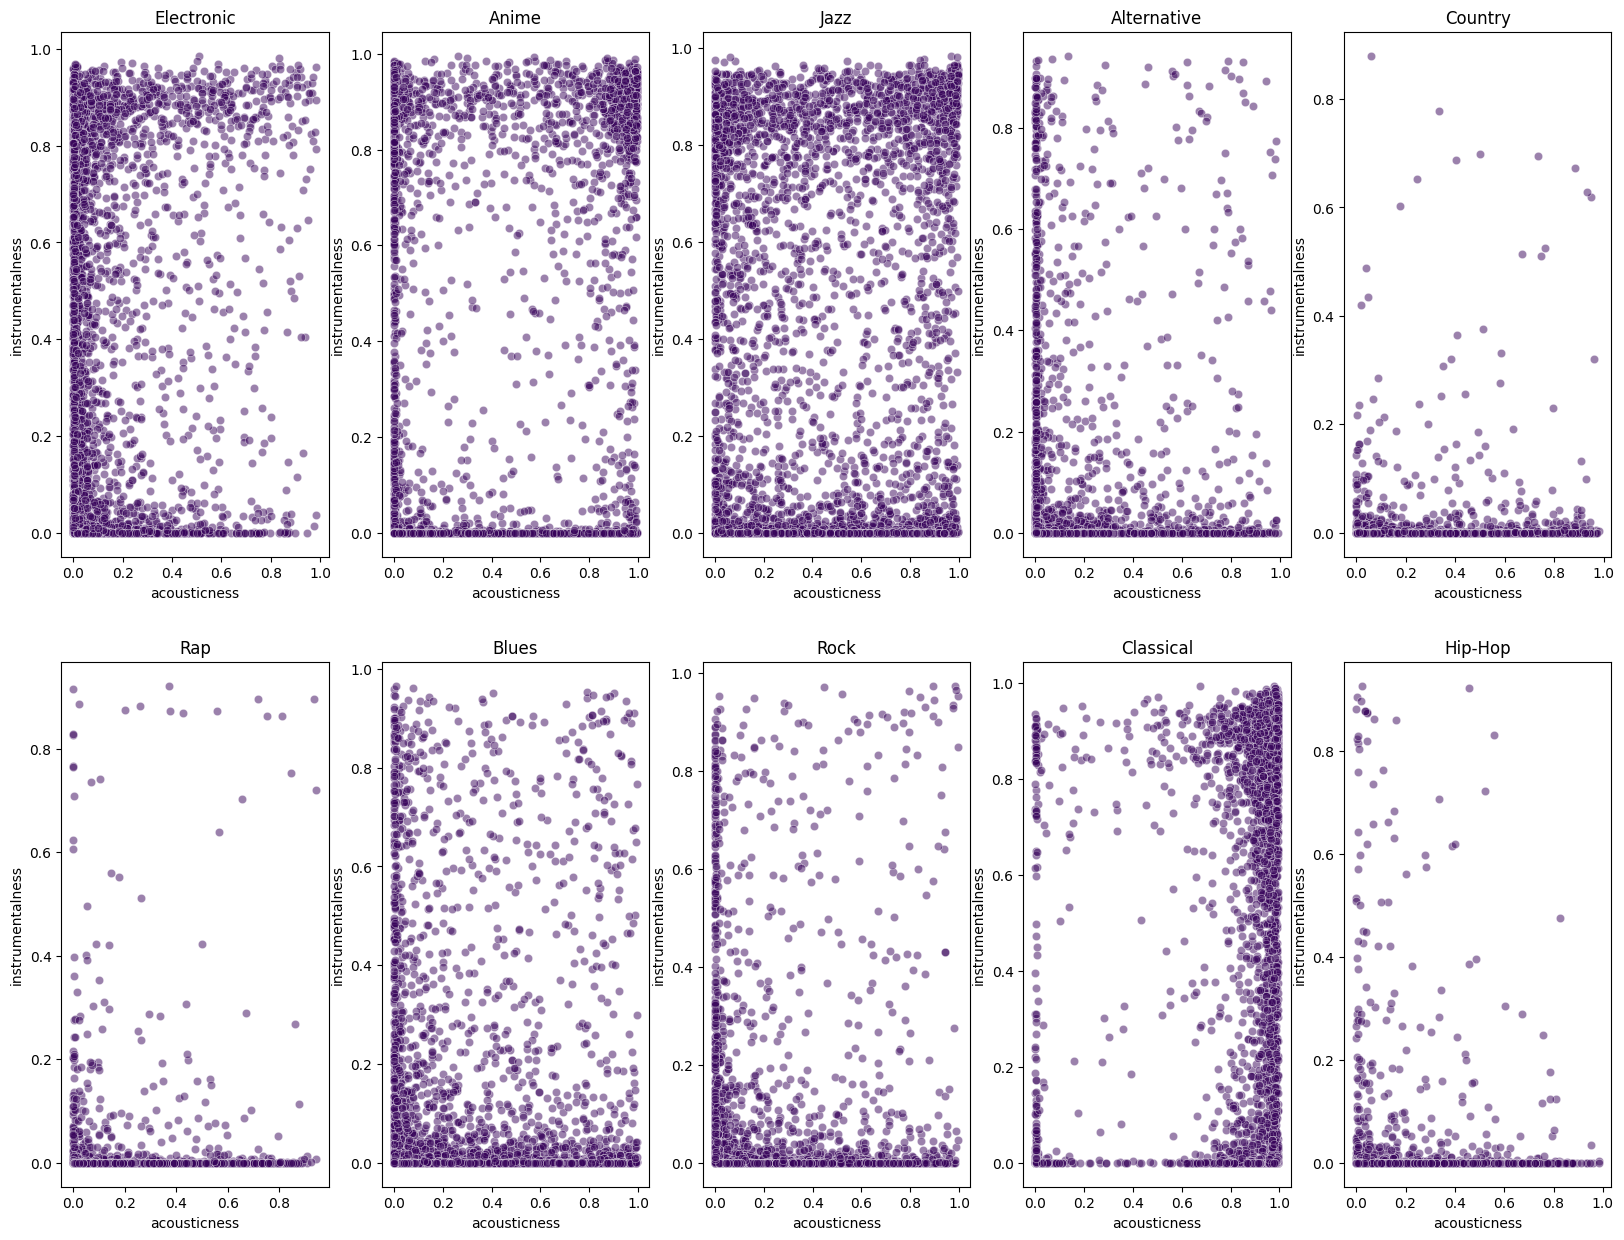

In [ ]:
plt.figure(figsize=(20,15))

plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
i = 1

for genero in df['music_genre'].unique():
  plt.subplot(2,5,i)
  sns.scatterplot(data = df[df['music_genre']== genero], x = 'acousticness', y='instrumentalness', color = color_principal, alpha = 0.5)
  plt.title(genero)
  i = i+1
plt.show()


Del grafico anterior podemos observar distintas cosas por cada genero:

- *Classical*: El genero clasico es mas acustico que todas las demas variables pero no asi con lo instrumental. Esto puede deberse a las operas o canciones clasicas.
- *Country*: La musica country parece estar distibuida respecto a la acusticidad pero no asi en instrumentalidad, lo que significa que casi todas las canciones country son cantadas.
- *Electronic*: La musica electronica puede o no tener voces pero es en oposicion a la clasica, menos acustica.
- *Hip-Hop y Rap*: El Rap y el Hio Hip son cantadas.

Text(0.5, 1.0, 'Energy vs Loudness')

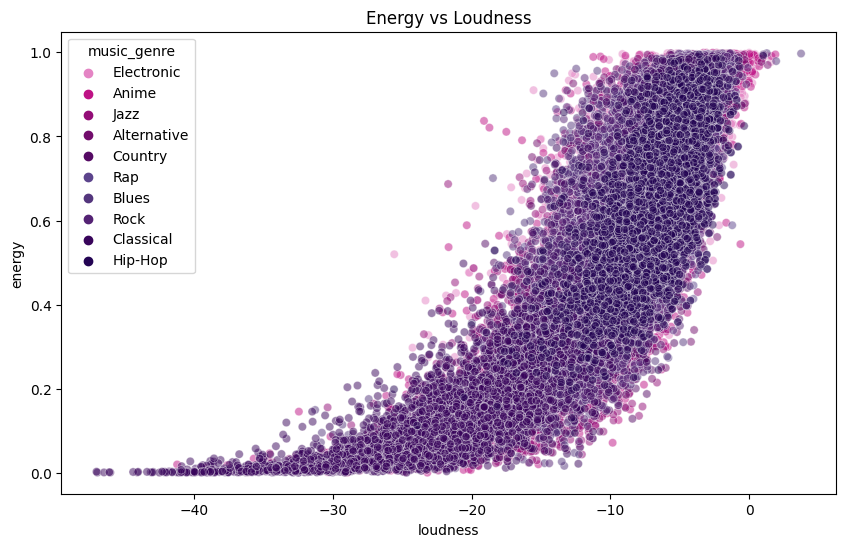

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'loudness', y='energy', palette = paleta, alpha = 0.5, hue = 'music_genre')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.title('Energy vs Loudness')

Parece haber un comportamiento puntual entre energy y loudness. Veamos que sucede con cada genero en especifico de forma aislada:

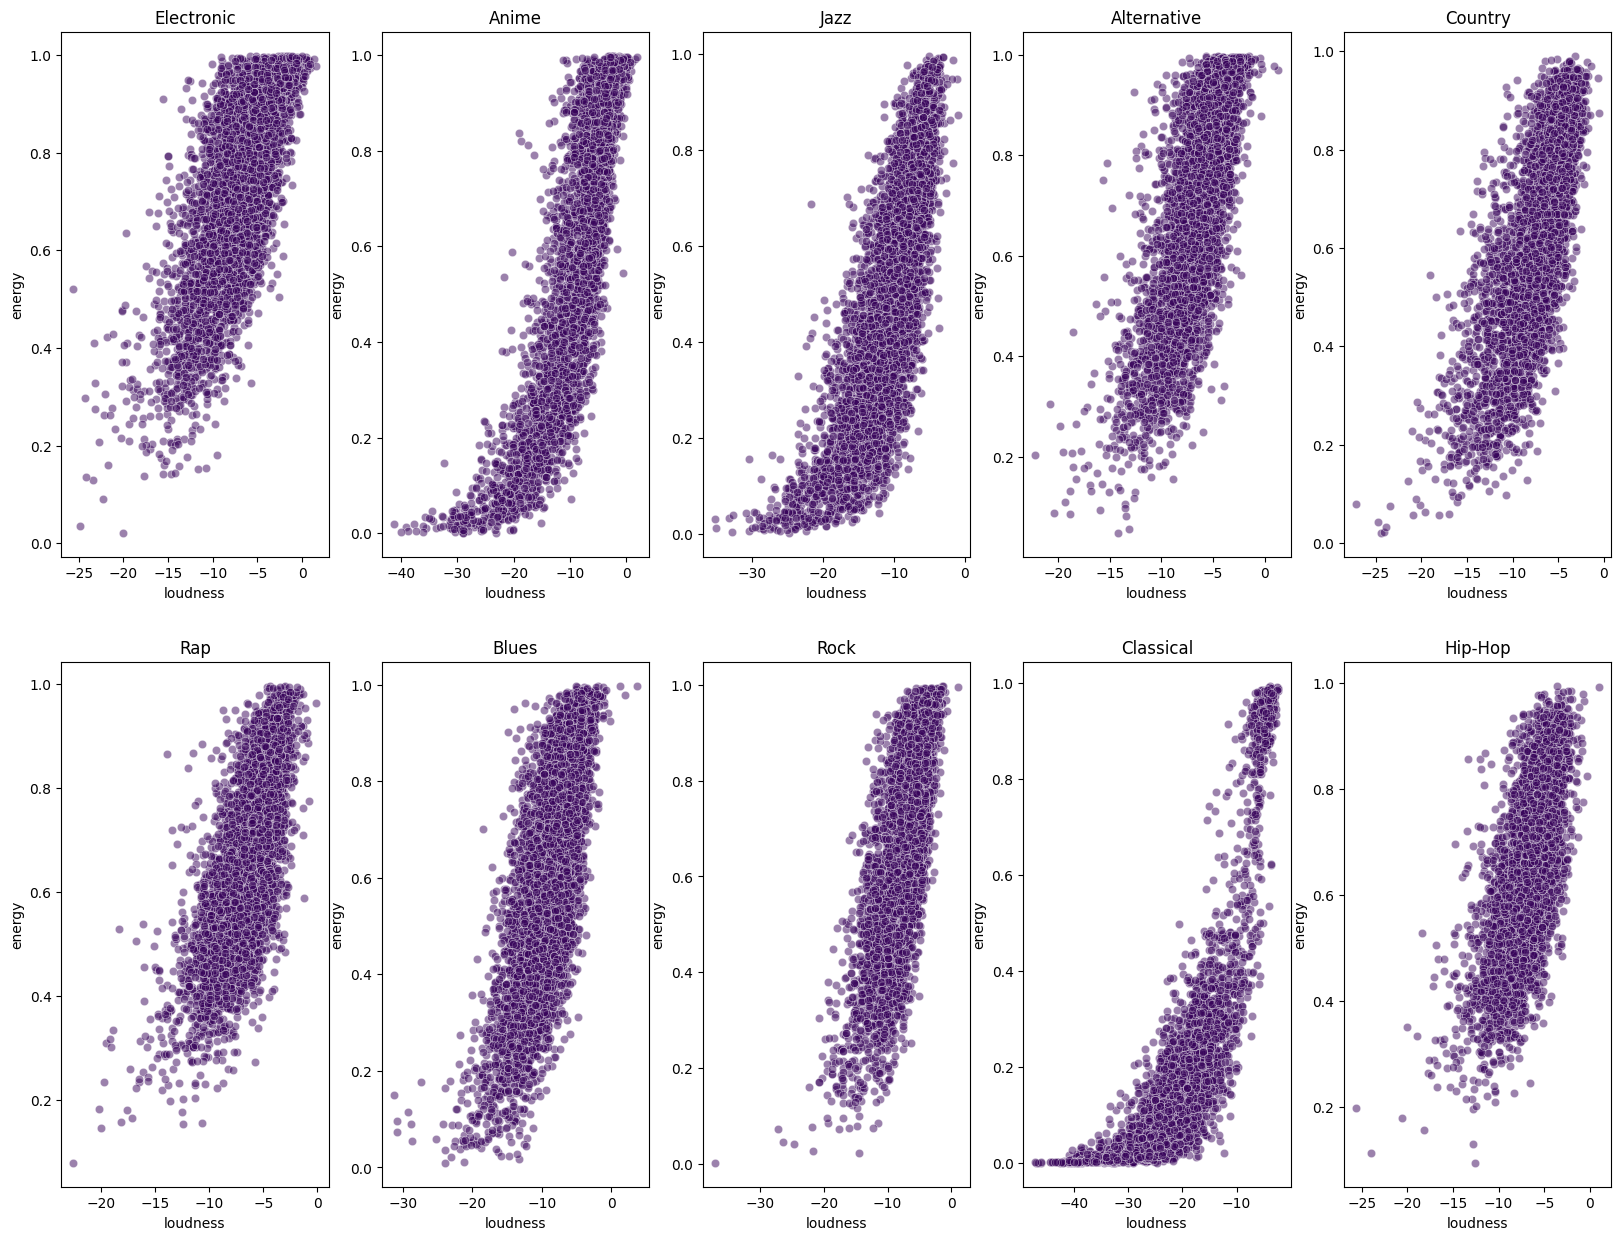

In [ ]:
plt.figure(figsize=(20,15))

i = 1

for genero in list(df['music_genre'].unique()):
  plt.subplot(2,5,i)
  sns.scatterplot(data = df[df['music_genre']== genero], x = 'loudness', y='energy', color = color_principal, alpha = 0.5)
  plt.xlabel('loudness')
  plt.ylabel('energy')
  plt.title(genero)
  i += 1
plt.show()

Observamos una clara relacion entre la variable energy y loudness siendo que a medida que ambas variables crecen en casi proporcionamente. El genero que tiene tiene menor loudness, es decir, mas suave es el genero clasico seguido por el anime, asi que la combinacion de ambas podria servir para una mejor clasificación.

## **3.3 Primeras impresiones**
----
**Recomendaciones**
* Las variables de `duration_ms` e `instrumentalness` parecen ser indicativas de géneros de música específicos, como *electrónica* y *clásica*.

* Los artistas no están puntualmente asociados a un género concreto.

* El dataset contiene más artistas de música en los géneros de *rock, alternativo y jazz*, lo que podría ser otro indicativo para no considerar a la variable `artist_name`.

Con el análisis realizado, los resultados del algoritmo de ML no serán muy precisos, ya que la relación entre las variables obtenidas del dataset y la variable objetivo no parece ser indicativa puntualmente de un género concreto, más que las mencionadas anteriormente.


## **3.4 Feature Engineer**
______
Siendo que las variable loudness y energy estan relacionadas las agruparemos en una sola variable.

In [ ]:
df['song_vibe'] = (df['loudness'] + df['acousticness'] ) / df['energy']
df['song_vibe']

0        -5.522125
1        -7.899213
2        -6.111179
3        -6.389429
4       -10.666695
           ...    
50000   -12.175261
50001   -26.676796
50002    -7.125858
50003   -10.451059
50004   -21.105919
Name: song_vibe, Length: 50000, dtype: float64

In [ ]:
df['song_vibe'].describe()

count    50000.000000
mean      -128.954642
std       1051.026361
min     -47503.144654
25%        -22.941699
50%        -11.022543
75%         -6.474799
max          3.755734
Name: song_vibe, dtype: float64

Tambien agruparemos la variable energy con danceability

In [ ]:
df['danceability_energy'] = df['danceability'] / df['energy']

Por ultimo eliminaremos las columnas que ya estan contenidas dentro de las nuevas variables 'loudness_energy' y 'danceability_energy'

In [ ]:
df.drop(['danceability','energy','loudness','acousticness', 'key'], axis = 1, inplace = True)

# **4. Feature selection**
----

Instalamos las librerias para realizar la seleccion de variables




In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Respecto a las variables categoricas realizaremos un label encoding para mode con sklearn.  One Hot Encoder usando getdummies de pandas

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder()

In [ ]:
transformacion = one_hot_encoder.fit_transform(df[['music_genre']])
target = pd.DataFrame(transformacion.toarray(), columns = one_hot_encoder.categories_)
print(target)

      Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz  Rap  \
0             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
1             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
2             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
3             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
4             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
...           ...   ...   ...       ...     ...        ...     ...  ...  ...   
49995         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49996         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49997         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49998         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49999         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   

      Rock  
0      0.0  
1      0.0  


In [ ]:
generos = ['Electronic','Anime','Jazz','Alternative','Country','Rap','Blues','Rock','Classical','Hip-Hop']

Usamos label encoder para transformar la columna de modo en 0 y 1

In [ ]:
print("Mode:", df['mode'].unique())
df['mode']= label_encoder.fit_transform(df['mode'])
print("Mode post label encoder:",df['mode'].unique())

Mode: ['Minor' 'Major']
Mode post label encoder: [1 0]


Siendo que hay unos errores en la variable tempo, asignamos a los tempos desconocidos le asignamos el valor de 100, ya que es un medio en la musica. Tambien creamos la variable X con nuestros valores predictores y la variable Y de nuestro target.

In [ ]:
df['tempo'] = df['tempo'].replace('?', 100).astype(float)
df.tempo.describe()

count    50000.000000
mean       117.965646
std         29.683333
min         34.347000
25%         96.775750
50%        113.779000
75%        139.468250
max        220.276000
Name: tempo, dtype: float64

Por ultimo vamos a estandarizar los valores de nuestros datos usando StandarScaler()

In [ ]:
from sklearn import preprocessing

datos_standard_scaler = preprocessing.StandardScaler().fit_transform(df[df.columns.difference(['music_genre'])])

In [ ]:
datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns= list(df[df.columns.difference(['music_genre'])]))
datos_standard_scaler

danceability_energy  duration_ms  instrumentalness  liveness      mode  \
0                -0.126822    -1.719534          1.875809 -0.488113  1.339082   
1                -0.126309    -0.023001          2.361357 -0.432433  1.339082   
2                -0.115843    -0.043830         -0.521812  2.104140 -0.746780   
3                -0.091499    -0.422611         -0.550300 -0.228269 -0.746780   
4                -0.093111     0.008676          2.235361 -0.228269 -0.746780   
...                    ...          ...               ...       ...       ...   
49995            -0.050013    -1.719534         -0.558074 -0.463366 -0.746780   
49996            -0.018529     0.237874         -0.558074 -0.525234 -0.746780   
49997            -0.108394    -0.246906         -0.558074 -0.314884 -0.746780   
49998            -0.044350     0.322687         -0.558074 -0.543794  1.339082   
49999            -0.071225     0.357614         -0.558074  0.483208  1.339082   

       popularity  song_vibe  speechiness     tempo   valence  
0       -1.108003   0.117441    -0.185322 -0.575300  1.225073  
1       -0.850633   0.115179    -0.627258 -0.099843  0.302431  
2       -1.043661   0.116881    -0.582867  0.337848 -0.498812  
3       -0.657606   0.116616     1.434452  0.338522 -0.753752  
4       -0.786291   0.112546    -0.515787  0.911981 -0.539278  
...           ...        ...          ...       ...       ...  
49995    0.950954   0.111111     2.016466 -0.671685 -0.510952  
49996    1.787405   0.097313    -0.380642  0.137363 -1.389081  
49997    0.436214   0.115915     0.517041  0.441779 -0.247918  
49998    1.337008   0.112751    -0.488166 -1.417633 -0.413831  
49999    1.465693   0.102614     0.073132 -0.632167  1.249353  

[50000 rows x 10 columns]

A continuación juntamos los datasets y eliminamos los valores nulos

In [ ]:
x = datos_standard_scaler
x

danceability_energy  duration_ms  instrumentalness  liveness      mode  \
0                -0.126822    -1.719534          1.875809 -0.488113  1.339082   
1                -0.126309    -0.023001          2.361357 -0.432433  1.339082   
2                -0.115843    -0.043830         -0.521812  2.104140 -0.746780   
3                -0.091499    -0.422611         -0.550300 -0.228269 -0.746780   
4                -0.093111     0.008676          2.235361 -0.228269 -0.746780   
...                    ...          ...               ...       ...       ...   
49995            -0.050013    -1.719534         -0.558074 -0.463366 -0.746780   
49996            -0.018529     0.237874         -0.558074 -0.525234 -0.746780   
49997            -0.108394    -0.246906         -0.558074 -0.314884 -0.746780   
49998            -0.044350     0.322687         -0.558074 -0.543794  1.339082   
49999            -0.071225     0.357614         -0.558074  0.483208  1.339082   

       popularity  song_vibe  speechiness     tempo   valence  
0       -1.108003   0.117441    -0.185322 -0.575300  1.225073  
1       -0.850633   0.115179    -0.627258 -0.099843  0.302431  
2       -1.043661   0.116881    -0.582867  0.337848 -0.498812  
3       -0.657606   0.116616     1.434452  0.338522 -0.753752  
4       -0.786291   0.112546    -0.515787  0.911981 -0.539278  
...           ...        ...          ...       ...       ...  
49995    0.950954   0.111111     2.016466 -0.671685 -0.510952  
49996    1.787405   0.097313    -0.380642  0.137363 -1.389081  
49997    0.436214   0.115915     0.517041  0.441779 -0.247918  
49998    1.337008   0.112751    -0.488166 -1.417633 -0.413831  
49999    1.465693   0.102614     0.073132 -0.632167  1.249353  

[50000 rows x 10 columns]

In [ ]:
y = target
y

Alternative Anime Blues Classical Country Electronic Hip-Hop Jazz  Rap  \
0             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
1             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
2             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
3             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
4             0.0   0.0   0.0       0.0     0.0        1.0     0.0  0.0  0.0   
...           ...   ...   ...       ...     ...        ...     ...  ...  ...   
49995         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49996         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49997         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49998         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   
49999         0.0   0.0   0.0       0.0     0.0        0.0     1.0  0.0  0.0   

      Rock  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
49995  0.0  
49996  0.0  
49997  0.0  
49998  0.0  
49999  0.0  

[50000 rows x 10 columns]

A continuacion utilizamos **foward selection** y **regresion linear** para la seleccion de variables predictorias.

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=12,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

Creamos la funcion prueba para validar cual es la mejor cantidad de features para predecir.

In [ ]:
def prueba(sfs,x,y):
  best_features_numer = 0
  max_score = 0
  for i in range(1,x.shape[1]):
    sfs.k_features = i
    sfs.fit(x, y)
    if sfs.k_score_ > max_score:
      max_score = sfs.k_score_
      best_features_numer = i
      print(f"Score: ",max_score,"\t\tCantidad features: ",best_features_numer)
  return best_features_numer, max_score

best_feature, max_score = prueba(sfs,x,y)

print(f'El mejor cantidad es {best_feature} con un score de {max_score}')


Score:  0.06899726527120233 		Cantidad features:  1
Score:  0.09278864134528807 		Cantidad features:  2
Score:  0.11697739171402684 		Cantidad features:  3
Score:  0.12723975833028156 		Cantidad features:  4
Score:  0.13179765681188996 		Cantidad features:  5
Score:  0.1352131004648338 		Cantidad features:  6
Score:  0.1378102276429543 		Cantidad features:  7
Score:  0.13925847025292099 		Cantidad features:  8
Score:  0.13999233669101566 		Cantidad features:  9
El mejor cantidad es 9 con un score de 0.13999233669101566


Finalmente, mostramos nuestras variables seleccionadas

In [ ]:
sfs.k_features = best_feature
sfs.fit(x, y)
sfs.k_feature_names_

('duration_ms',
 'instrumentalness',
 'liveness',
 'mode',
 'popularity',
 'song_vibe',
 'speechiness',
 'tempo',
 'valence')

# **5.Algoritmo de clasificación**
-----


### **5.1 Arbol de decisión**

A continuacion importamos las librerias que utilizaremos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

Separamos el dataset utilizando la funcion train_test_split de scikit learn.

In [ ]:
entrenar_x, predecir_x, entrenar_y, predecir_y = train_test_split(x, y)

Creamos el modelo de arbol de decision y lo guardamos en arbol_decision_modelo. Tambien entrenamos el modelo con los datos

In [ ]:
arbol_decision_modelo = DecisionTreeClassifier()

#entrenamos el modelo
arbol_decision_modelo.fit(entrenar_x,entrenar_y)

DecisionTreeClassifier()

A continuación observaremos los y ajustaremos los hiperparametros del modelo para entender cual puede representar una mejora al modelo.

In [ ]:
arbol_decision_modelo.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {'ccp_alpha': (0.0,0.5),
              'criterion': ('gini', 'entropy'),
              'max_features': (None,13,36),
              'splitter': ('best','random')}

Siendo que del modelo nos interesa el accuracy para clasificar correctamente, usaremos accuracy.

In [ ]:
grid_search = GridSearchCV(arbol_decision_modelo,
                       parametros,
                       scoring="accuracy")

grid_search.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': (0.0, 0.5),
                         'criterion': ('gini', 'entropy'),
                         'max_features': (None, 13, 36),
                         'splitter': ('best', 'random')},
             scoring='accuracy')

Observemos los resultados

In [ ]:
print(grid_search.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_features': None, 'splitter': 'best'}


A continuación, ajustamos los hiperparametros de nuestro modelo y realizamos las predicciones

In [ ]:
arbol_decision_modelo.set_params(ccp_alpha= 0.0, criterion= 'gini', max_features= None, splitter= 'best')
predicciones = arbol_decision_modelo.predict(predecir_x)
predicciones

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

Evaluamos la accuracy del modelo con la funcion accuracy_score

In [ ]:
accuracy = accuracy_score(predecir_y, predicciones)
print("Accuracy:", accuracy)

Accuracy: 0.41664


In [ ]:
print(metrics.classification_report(predecir_y, predicciones))

              precision    recall  f1-score   support

           0       0.29      0.30      0.29      1259
           1       0.64      0.63      0.64      1199
           2       0.39      0.39      0.39      1284
           3       0.75      0.73      0.74      1342
           4       0.42      0.45      0.44      1216
           5       0.44      0.41      0.43      1300
           6       0.29      0.28      0.29      1215
           7       0.32      0.33      0.33      1210
           8       0.27      0.24      0.25      1262
           9       0.40      0.39      0.39      1213

   micro avg       0.43      0.42      0.42     12500
   macro avg       0.42      0.41      0.42     12500
weighted avg       0.42      0.42      0.42     12500
 samples avg       0.42      0.42      0.42     12500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observamos que tal como lo vimos en el analisis anterior, fué mas facil de predecir de forma correcta los géneros de Anime y de musica Clasica con una precision de .62 y .74 respectivamente.

### **5.2 Random Forest**

A continuación realizaremos dos algoritmos mas SVM (Support Vector Machine) y Random Forest.

SVM busca un hiperplano óptimo para separar clases, mientras que Random Forest utiliza múltiples árboles de decisión y combina sus predicciones para obtener una clasificación más precisa y robusta.

In [ ]:
#Importamos las librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Manteniendo el split de los datos utilizados para el arbol de decisión, crearemos el modelo de **Random Forest** y lo entrenaremos.

In [ ]:
random_forest_modelo = RandomForestClassifier()

Observaremos los parametros del modelo y lo buscaremos mejorar algunos de sus hiperparametros.

In [ ]:
random_forest_modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parametros = {'criterion': ('gini', 'entropy'),
              'max_samples' : (1/3, 2/3),
              'n_estimators': (100,200)}

In [ ]:
grid_search = GridSearchCV(random_forest_modelo,
                       parametros,
                       scoring="accuracy")

grid_search.fit(x,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (100, 200)},
             scoring='accuracy')

In [ ]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 100}


In [ ]:
random_forest_modelo.set_params(criterion= 'gini', max_samples= 0.3333333333333333, n_estimators= 100)

RandomForestClassifier(max_samples=0.3333333333333333)

Realizamos las predicciones con el modelo

In [ ]:
random_forest_modelo.fit(entrenar_x, entrenar_y)  # Entrenamiento del modelo

RandomForestClassifier(max_samples=0.3333333333333333)

In [ ]:
predicciones_random_forest = random_forest_modelo.predict(predecir_x)

Vemos el accuracy del modelo y realizamos el classification report el cual proporciona detalle de la precisión, el recall y la puntuación F1 para cada clase en el problema de clasificación. Esto nos ayuda a evaluar el modelo.

In [ ]:
accuracy_random_forest = accuracy_score(predecir_y, predicciones_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)

Random Forest Accuracy: 0.30792


In [ ]:
classification_report_random_forest = classification_report(predecir_y, predicciones_random_forest)

print("\nRandom Forest Classification Report:")
print(classification_report_random_forest)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.06      0.10      1259
           1       0.88      0.60      0.72      1199
           2       0.78      0.29      0.42      1284
           3       0.88      0.75      0.81      1342
           4       0.72      0.34      0.46      1216
           5       0.81      0.30      0.44      1300
           6       0.27      0.12      0.16      1215
           7       0.64      0.19      0.30      1210
           8       0.30      0.11      0.16      1262
           9       0.55      0.29      0.38      1213

   micro avg       0.68      0.31      0.42     12500
   macro avg       0.65      0.31      0.40     12500
weighted avg       0.65      0.31      0.40     12500
 samples avg       0.31      0.31      0.31     12500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo de random forest a entregado un accuracy menor al de decision tree.

### **5.3 SVM**

A continuacion relizaremos el modelo de vectores para comparara resultados:

In [ ]:
entrenar_x, predecir_x, entrenar_y, predecir_y = train_test_split(x, df['music_genre'])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


svm_modelo = SVC(C=0.1,kernel='rbf',random_state=42)

svm_modelo.fit(entrenar_x, entrenar_y)

SVC(C=0.1, random_state=42)

Una vez entrenado el modelo, realizamos las predicciones

In [ ]:
svm_predictions = svm_modelo.predict(predecir_x)
svm_predictions

array(['Rock', 'Blues', 'Jazz', ..., 'Hip-Hop', 'Blues', 'Jazz'],
      dtype=object)

Vemos el accuracy del modelo y realizamos el classification report

In [ ]:
# Evaluación del modelo SVM
svm_accuracy = accuracy_score(predecir_y, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.47872


In [ ]:
svm_classification_report = classification_report(predecir_y, svm_predictions)
print("SVM Classification Report:")
print(svm_classification_report)

SVM Classification Report:
              precision    recall  f1-score   support

 Alternative       0.31      0.26      0.29      1254
       Anime       0.66      0.59      0.62      1249
       Blues       0.45      0.45      0.45      1217
   Classical       0.72      0.68      0.70      1267
     Country       0.43      0.58      0.49      1237
  Electronic       0.48      0.45      0.47      1230
     Hip-Hop       0.42      0.45      0.44      1264
        Jazz       0.47      0.32      0.38      1277
         Rap       0.46      0.30      0.36      1259
        Rock       0.44      0.71      0.54      1246

    accuracy                           0.48     12500
   macro avg       0.48      0.48      0.47     12500
weighted avg       0.48      0.48      0.47     12500



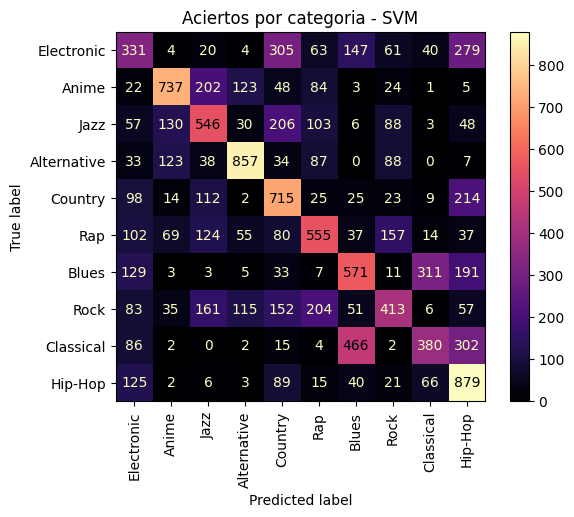

In [ ]:
confusion_matrix = metrics.confusion_matrix(predecir_y, svm_predictions)
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=generos)

display.plot(cmap = 'magma')
plt.title('Aciertos por categoria - SVM')
plt.xticks(rotation=90)
plt.show()

### **5.4 Gradient Boost Classifier**

 Utiliza un enfoque de conjunto, combinando múltiples árboles de decisión débiles en una secuencia para mejorar la precisión de las predicciones. En cada paso, el algoritmo entrena un nuevo árbol para corregir los errores de los árboles anteriores, dando más importancia a los ejemplos que se clasificaron incorrectamente.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=200)

GBC.fit(entrenar_x, entrenar_y)

GradientBoostingClassifier(n_estimators=200)

Realizamos las predicciones

In [ ]:
gbc_predictions = GBC.predict(predecir_x)
gbc_predictions

array(['Rock', 'Blues', 'Blues', ..., 'Hip-Hop', 'Blues', 'Jazz'],
      dtype=object)

Vemos el accuracy del modelo y realizamos el classification report

In [ ]:
# Evaluación del modelo SVM
gbc_accuracy = accuracy_score(predecir_y, gbc_predictions)
print("GBC Accuracy:", gbc_accuracy)

GBC Accuracy: 0.57016


In [ ]:
GBC_classification_report = classification_report(predecir_y, gbc_predictions)
print("GBC Classification Report:")
print(GBC_classification_report)

GBC Classification Report:
              precision    recall  f1-score   support

 Alternative       0.43      0.36      0.39      1254
       Anime       0.80      0.75      0.77      1249
       Blues       0.58      0.52      0.55      1217
   Classical       0.81      0.82      0.82      1267
     Country       0.59      0.60      0.59      1237
  Electronic       0.65      0.60      0.62      1230
     Hip-Hop       0.42      0.42      0.42      1264
        Jazz       0.51      0.50      0.51      1277
         Rap       0.42      0.41      0.42      1259
        Rock       0.51      0.72      0.60      1246

    accuracy                           0.57     12500
   macro avg       0.57      0.57      0.57     12500
weighted avg       0.57      0.57      0.57     12500



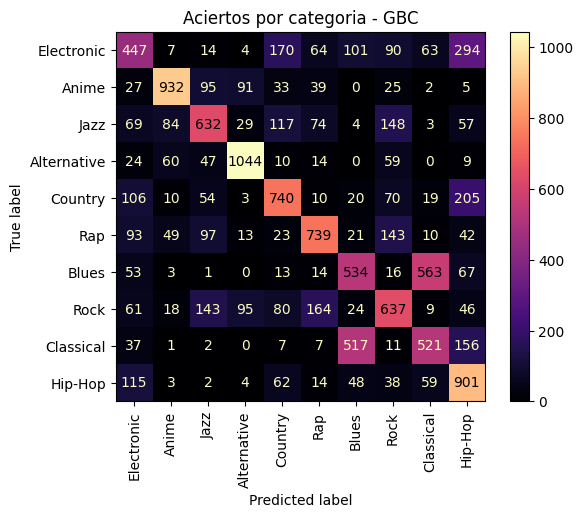

In [ ]:
confusion_matrix = metrics.confusion_matrix(predecir_y, gbc_predictions)
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=generos)

display.plot(cmap = 'magma')
plt.title('Aciertos por categoria - GBC')
plt.xticks(rotation=90)
plt.show()

# **6.Conclusion**
-------
En el punto 5.4 hemos utilizado el algoritmo de árbol de decisión y hemos obtenido un accuracy del 41%. Es posible que el algoritmo, o este tipo de modelo en particular, no esté capturando todas las relaciones y patrones en los datos debido a variables predictoras con poca fuerza de predicción, como lo evaluamos en el feature selection.

 Observamos que el algoritmo de Random Forest tuvo un peor accuracy en comparación con SVM y Decision Tree y XGBoost. Sin embargo, su accuracy sigue estando por debajo del 60%, lo que podría indicar un caso de **underfitting**. Esto podría ser consecuencia de haber seleccionado todas las variables del dataset, lo que sugiere que las variables pueden no ser lo suficientemente fuertes para predecir con precisión.

En resumen, es importante seguir explorando y ajustando el modelo para obtener mejores resultados, considerando diferentes algoritmos y mejorando la selección de características para lograr una clasificación más precisa.

In [ ]:
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", accuracy_random_forest)
print("Decision Tree Accuracy:", accuracy)
print("Gradient Boost Classifier Accuracy:", gbc_accuracy)

SVM Accuracy: 0.47872
Random Forest Accuracy: 0.30792
Decision Tree Accuracy: 0.41664
Gradient Boost Classifier Accuracy: 0.57016


# **7. Storytelling**
______


Pasamos por epocas en las que para escuchar nuestro género favorito, teniamos que ir a la disquera a comprar o alquiler varios CD's de nuestas bandas favoritas o esperar que la radio que nus gustaba, pasara esas canciones que tanto queriamos escuchar.

Hoy en dia gracias a la globalizacion y plataformas de streaming, la cantidad de musica disponible y la diversidad de gustos musicales se ha expandido creando la necesidad de ofrecer recomendaciones personalizadas a los oyentes.

La música nos acompaña tanto en momentos tristes como alegres, en salidas con amigos y en casa.


> Si la cena en casa con los tragos de cocktail, amerita una colección de jazz, mi plataforma de musica, **¿puede agrupar las canciones por género?**

En este proyecto, nos propusimos desarrollar un algortimo que pueda clasificar canciones segun sus atributos en distintos genero musicales.

### Los datos

Para realizar el proyecto, buscamos un dataset que contenga los atributos necesarios para poder realizar la clasificación, asi fue como llegamos a Spotify.

Según un analisis de [statista](https://es.statista.com/) el prime trimestre de 2023, Spotify tuvo activos 515 millones de usuarios. Así que decidimos aprovechar la cantidad de datos del gran streamer de musica.






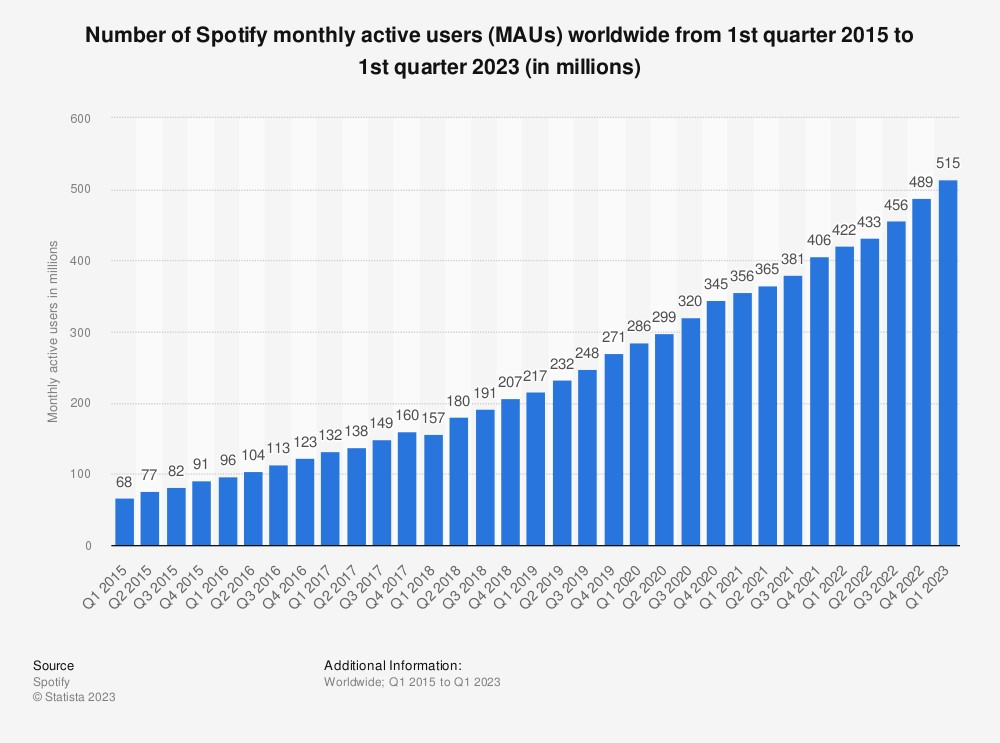

Comenzamos a trabajar con nuestros datos, para los cuales contamos con una muestra que contempla 5mil registros por cada genero. Esto nos permite tener una distribución normal para nuestras pruebas.

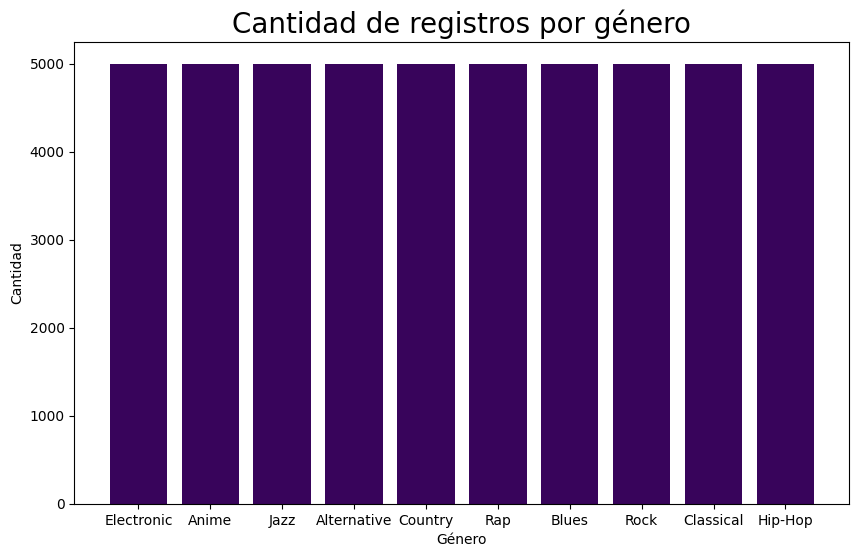

In [ ]:
cantidad_genero = df.music_genre.value_counts()
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(cantidad_genero.index, cantidad_genero.values, color = color_principal)
ax.set_title("Cantidad de registros por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad")
fig.show()

Analizamos y limpiamos los datos usando diferentes librerias como pandas, matplolib y seaborn para llegar a algunas conclusiones:

* La duracion y la istumentalidad parecen ser indicativas de géneros de música específicos, como *electrónica* y *clásica*.

* Los **artistas** no están puntualmente asociados a un género concreto.

* El dataset contiene más artistas de música en los géneros de *rock, alternativo y jazz*.


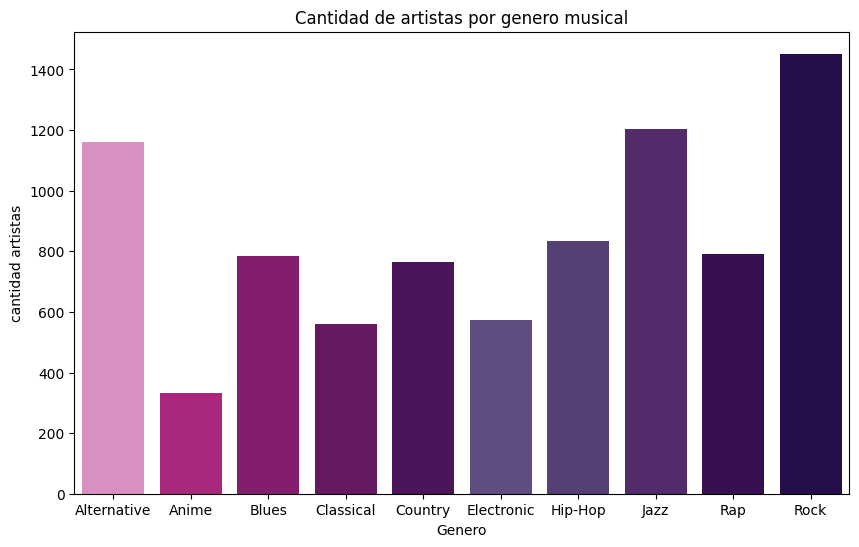

In [ ]:
artist_genre_counts = df.groupby('music_genre')['artist_name'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_genre_counts.index, y=artist_genre_counts.values, palette = paleta)
plt.xlabel('Genero')
plt.ylabel('cantidad artistas')
plt.title('Cantidad de artistas por genero musical')
plt.show()

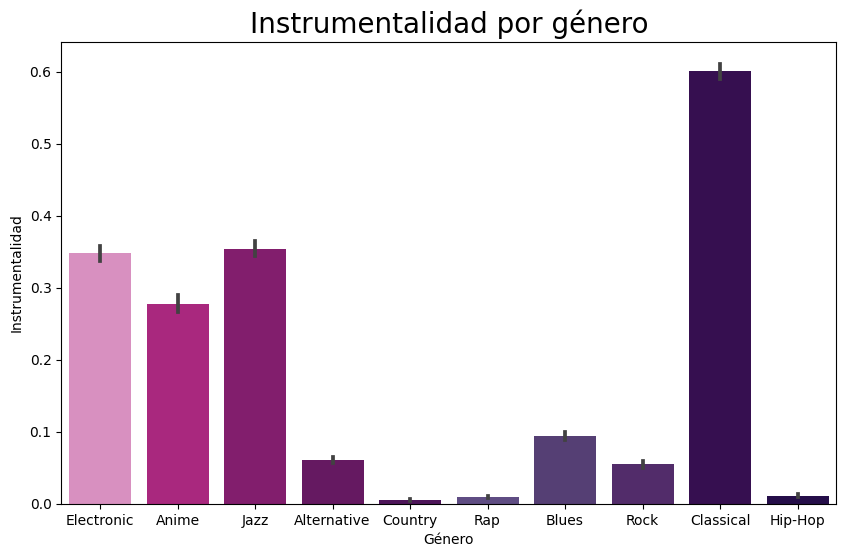

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df, x='music_genre',y= 'instrumentalness', ax = ax, palette = paleta)
ax.set_title("Instrumentalidad por género",size = 20)
ax.set_xlabel("Género")
ax.set_ylabel("Instrumentalidad")
fig.show()

Hemos probado 4 modelos de clasificación para este caso:

* Random Forest
* Decision Tree
* SVM
* GBC

Luego de seleccionar las variables con feature selection hemos obtenido un accuracy de 57% con **GBC**.

Sin embargo, su accuracy sigue estando por debajo del 60%, lo que podría indicar un caso de **underfitting**.

Con estos resultados, entendemos que es importante seguir explorando y ajustando el modelo para obtener mejores resultados, considerando diferentes algoritmos y mejorando la selección de características para lograr una clasificación más precisa.